In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/mental health corpus/mental_health.csv")

In [3]:
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [4]:
df.shape

(27977, 2)

In [5]:
df.dtypes

text     object
label     int64
dtype: object

In [6]:
df['label'].unique()

array([0, 1])

From the dataset we have two labels which are, 0 and 1. 0 stands for comments that can be considered as not having a mental issue, why 1 stands for comments that could potentially have mental issues

In [7]:
msg = df.text

In [8]:
msg = msg.str.replace('[^a-zA-Z0-9]+'," ")

<ipython-input-8-fa746dfb5139>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg = msg.str.replace('[^a-zA-Z0-9]+'," ")


In [9]:
text_corpus = ' '.join(df['text'].values)

In [10]:
wordcloud = WordCloud(width=800, height=400).generate(text_corpus)

In [11]:
import matplotlib.pyplot as plt

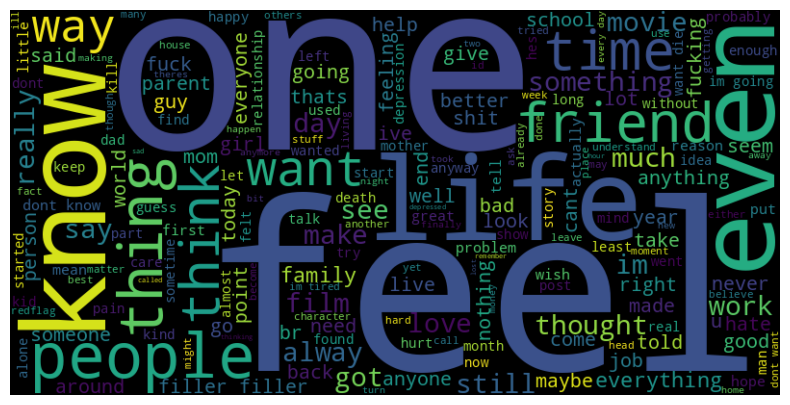

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
stemmer = PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))

In [15]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(msg)
print(data_vec)

  (0, 29361)	0.21988283536809647
  (0, 40085)	0.11541034140805974
  (0, 27592)	0.07086319412141234
  (0, 19414)	0.32471650998367996
  (0, 48061)	0.37243569860675485
  (0, 44226)	0.3364124637124512
  (0, 887)	0.16632522516578688
  (0, 27051)	0.33557077133590657
  (0, 47622)	0.09440619098398988
  (0, 13702)	0.19490929146614272
  (0, 52265)	0.10351565284150316
  (0, 18576)	0.07759597313565271
  (0, 20152)	0.2557466886524221
  (0, 21002)	0.18253765172593855
  (0, 35822)	0.11663849024067591
  (0, 13552)	0.30464342156992635
  (0, 38242)	0.15904470617124175
  (0, 46964)	0.198919889368548
  (0, 1656)	0.2015081835803492
  (0, 11054)	0.24792918190720103
  (1, 31816)	0.20055611996229755
  (1, 20515)	0.2709798068850241
  (1, 52036)	0.12562275617052768
  (1, 28907)	0.15213981622366787
  (1, 10864)	0.16056692897859115
  :	:
  (27976, 33344)	0.4316038589925272
  (27976, 43738)	0.21114597297289087
  (27976, 30370)	0.34842911965438494
  (27976, 23436)	0.12449964569835628
  (27976, 43734)	0.178987523156

In [18]:
y=df['label'].values
y

array([0, 1, 0, ..., 1, 1, 0])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
sv=SVC()
# nb=GaussianNB()
rf=RandomForestClassifier()
ab= AdaBoostClassifier()
models=[sv, rf, ab]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4252
           1       0.94      0.89      0.91      4142

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4252
           1       0.89      0.89      0.89      4142

    accuracy                           0.89      8394
   macro avg       0.89      0.89      0.89      8394
weighted avg       0.89      0.89      0.89      8394

AdaBoostClassifier()


In [ ]:
sv.fit(x_train, y_train)

In [ ]:
y_pred = sv.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [25]:
text_input = ["I'm so tired all the time", "I'm feeling suicidal", "I feel like killing my self"]

In [26]:
import re

def change_inputs(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return text

changed_inputs = [change_inputs(text) for text in text_input]

In [27]:
changed_inputs

['im so tired all the time',
 'im feeling suicidal',
 'i feel like killing my self']

In [28]:
preprocessed_input = tf.transform(changed_inputs)

In [30]:
sv.predict(preprocessed_input)

array([0, 0, 1])